# Example of optimizing a convex function

In [1]:
from mango.tuner import Tuner

In [2]:

param_dict = {
    'x': range(-10000, 10000)
}

    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        result = -(x**2)
        results.append(result)
    return results

In [3]:
conf = dict()
conf['batch_size'] = 5
conf['initial_random'] = 5
conf['num_iteration'] = 20
conf['domain_size'] = 10000

In [4]:
tuner = Tuner(param_dict, objfunc,conf)
print('Tuner Configuration')
print(tuner.Config())

Tuner Configuration
{'param_dict': {'x': range(-10000, 10000)}, 'userObjective': <function objfunc at 0x105d476a8>, 'domain_size': 10000, 'initial_random': 5, 'num_iteration': 20, 'objective': 'maximize', 'batch_size': 5}


In [5]:
results = tuner.maximize()

In [6]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x': 0}
best objective: 0


In [7]:
# Actual Opt Values
x_opt = 0
print("Real x_opt are:",x_opt)

Real x_opt are: 0


# Actual variation in the objective

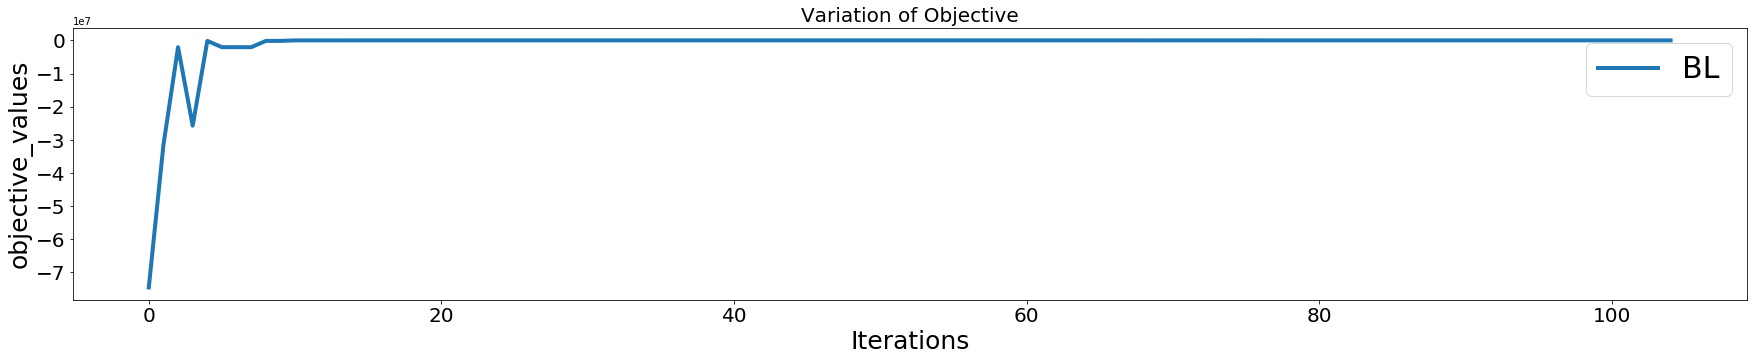

In [9]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation in the max objective

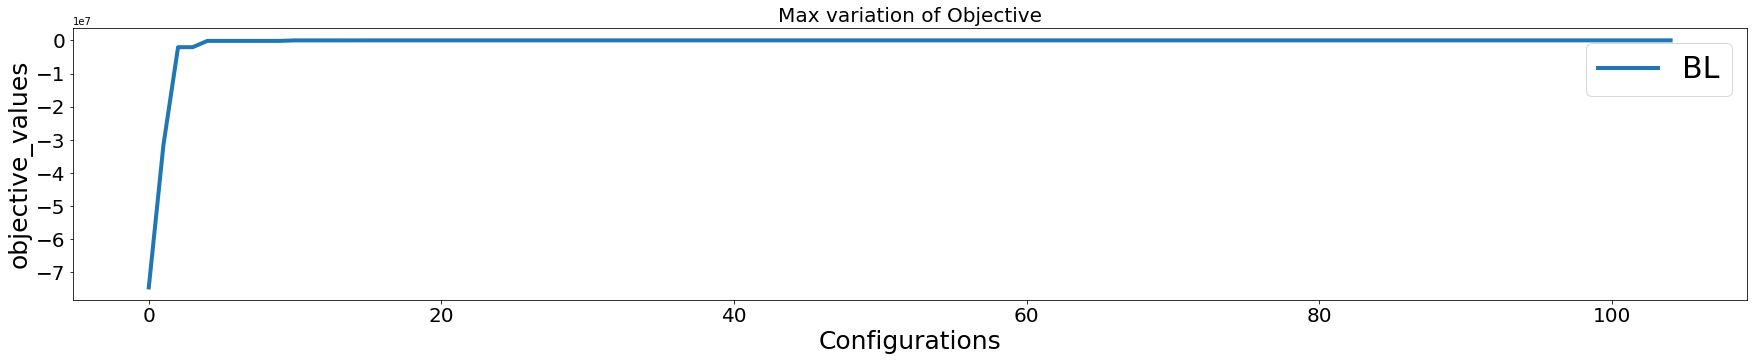

In [10]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

In [11]:
x_values = []
for a in results['params_tried']:
    x_values.append(a['x'])

In [14]:
print(x_values)

[-8632, -5619, -1435, -5072, 405, -1436, -1433, -1437, 408, 401, 96, 97, 98, 100, 95, 3, 2, 7, 8, 11, 0, 1, -1, -3, 4, -5, -6, -8, -9, 10, -2, -4, 5, 6, -7, -11, -13, -14, -15, -16, 9, -10, 13, 14, 16, -12, 12, -17, 18, -18, 17, 22, -22, 24, -25, -19, 21, 23, 27, 28, 19, -23, 26, 29, -29, 15, -20, 20, 30, -30, -24, 25, -26, -27, -28, -21, 31, -31, 33, 34, 32, -32, -34, -36, 38, -33, 35, -35, 36, 39, -37, -39, 40, -40, -43, 37, 41, -41, 43, -44, -38, 42, -46, -47, 49]


In [15]:
np.sort(x_values)

array([-8632, -5619, -5072, -1437, -1436, -1435, -1433,   -47,   -46,
         -44,   -43,   -41,   -40,   -39,   -38,   -37,   -36,   -35,
         -34,   -33,   -32,   -31,   -30,   -29,   -28,   -27,   -26,
         -25,   -24,   -23,   -22,   -21,   -20,   -19,   -18,   -17,
         -16,   -15,   -14,   -13,   -12,   -11,   -10,    -9,    -8,
          -7,    -6,    -5,    -4,    -3,    -2,    -1,     0,     1,
           2,     3,     4,     5,     6,     7,     8,     9,    10,
          11,    12,    13,    14,    15,    16,    17,    18,    19,
          20,    21,    22,    23,    24,    25,    26,    27,    28,
          29,    30,    31,    32,    33,    34,    35,    36,    37,
          38,    39,    40,    41,    42,    43,    49,    95,    96,
          97,    98,   100,   401,   405,   408])